In [434]:
import chemfp
from chemfp import search
import bclus
import pandas as pd
import time
import sys
import subprocess as sp
from rdkit import Chem
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import scipy.spatial.distance as ssd
import matplotlib
import pylab
import random
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import rdkit.Chem.Scaffolds.MurckoScaffold as ms

In [464]:
def divan(smidf):
    
    start = time.time()
    
    # Cluster by butina and cl
    clr_bu = clusmidf(smidf)
    clr_cl = clusmidf(smidf, method = 'cl', th = 0.55)
    
    # Count the number of cluster in each method
    ncl_bu = len(clr_bu)
    ncl_cl = len(clr_cl)
    
    # Count Murko frameworks
    fras = [Chem.MolToSmiles(ms.GetScaffoldForMol(Chem.MolFromSmiles(s))) for s in smidf.smiles]
    nfra = len(np.unique(fras))
    
    # Count generic Murko frameworks
    frasg = [Chem.MolToSmiles(ms.MakeScaffoldGeneric(Chem.MolFromSmiles(s))) for s in smidf.smiles]
    nfrag = len(np.unique(frasg))
    
    end = time.time()
    eltime = end - start
    print('Diversity analysis time: ' + time.strftime("%H:%M:%S", time.gmtime(eltime)))
    
    return ncl_bu, ncl_cl, nfra

In [491]:
def novan(smidfq, smidft, th = 0.7):
    
    start = time.time()
    
    # Get the arenas
    arq = smidf2arena(smidfq)
    art = smidf2arena(smidft)
    
    end = time.time()
    eltime = end - start
    print('Arenas creation time: ' + time.strftime("%H:%M:%S", time.gmtime(eltime)))
    
    # Find hits
    results = chemfp.search.threshold_tanimoto_search_arena(arq, art, threshold=th)
    
    # Generate list with new guys and calculate its length
    new = []
    for query_id, query_hits in zip(arq.ids, results):
        if len(query_hits) == 0:
            new.append(query_id)
    
    
    # Generate list of frameworks for query and target
    fraq = [Chem.MolToSmiles(ms.GetScaffoldForMol(Chem.MolFromSmiles(s))) for s in smidfq.smiles]
    fraq = list(np.unique(fraq))
    frat = [Chem.MolToSmiles(ms.GetScaffoldForMol(Chem.MolFromSmiles(s))) for s in smidft.smiles]
    fraq = list(np.unique(frat))
    
    
    
    end = time.time()
    eltime = end - start
    print('Novelty analysis time: ' + time.strftime("%H:%M:%S", time.gmtime(eltime)))
    
    return new, len(new)
    

In [ ]:
smidfq = q
smidft = z
fraq = [Chem.MolToSmiles(ms.GetScaffoldForMol(Chem.MolFromSmiles(s))) for s in smidfq.smiles]
fraq = list(np.unique(fraq))
frat = [Chem.MolToSmiles(ms.GetScaffoldForMol(Chem.MolFromSmiles(s))) for s in smidft.smiles]
fraq = list(np.unique(frat))

In [469]:
def smisf2smidf(smisf, noid = True):
    
    if noid:
        smidf = pd.read_csv(smisf, delim_whitespace = True, names = ['smiles'], header = None)
    else:
        smidf = pd.read_csv(smisf, delim_whitespace = True, names = ['smiles','id'], header = None)
    
    return smidf
    
z = smisf2smidf('../data/z310k.smi', noid = False)

In [16]:
def corrsmis(smis):
    n = len(smis)
    corr_smi_yn = [x != None for x in [Chem.MolFromSmiles(s) for s in smis]]
    ncorr = sum(corr_smi_yn)
    smis = [smi for i, smi in enumerate(smis) if corr_smi_yn[i] == True]
    return ncorr, n, smis
    

In [481]:
qsmi = smif2smis('../exp1/unc50000.csv')
qsmi = corrsmis(qsmi)[2]

q = smis2smidf(qsmi)

RDKit ERROR: [15:14:52] SMILES Parse Error: unclosed ring for input: 'CC(C)(C)OC(=O)N1CCN(C(=O)c2cc3cccc4cccc3c2)CC1'
RDKit ERROR: [15:14:52] Can't kekulize mol.  Unkekulized atoms: 19 21 22
RDKit ERROR: 
RDKit ERROR: [15:14:52] Can't kekulize mol.  Unkekulized atoms: 1 2 10 12 27
RDKit ERROR: 
RDKit ERROR: [15:14:52] Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 20
RDKit ERROR: 
RDKit ERROR: [15:14:52] Can't kekulize mol.  Unkekulized atoms: 12 13 14 26 27
RDKit ERROR: 
RDKit ERROR: [15:14:52] Can't kekulize mol.  Unkekulized atoms: 20 21 22 25 28
RDKit ERROR: 
RDKit ERROR: [15:14:52] Can't kekulize mol.  Unkekulized atoms: 1 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [15:14:52] Can't kekulize mol.  Unkekulized atoms: 2 3 4 16 23 25 26
RDKit ERROR: 
RDKit ERROR: [15:14:52] Can't kekulize mol.  Unkekulized atoms: 6 7 9 22 23
RDKit ERROR: 
RDKit ERROR: [15:14:52] SMILES Parse Error: unclosed ring for input: 'C=CCOc1cccc(C=CC(=O)c2cccs1)c1'
RDKit ERROR: [15:14:52] SMILES Parse Error: e

RDKit ERROR: 
RDKit ERROR: [15:14:52] SMILES Parse Error: unclosed ring for input: 'CCS(=O)(=O)CC(F)(F)C1'
RDKit ERROR: [15:14:52] Can't kekulize mol.  Unkekulized atoms: 6 7 8 24 25 26 27
RDKit ERROR: 
RDKit ERROR: [15:14:52] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 7 8 24 25 26
RDKit ERROR: 
RDKit ERROR: [15:14:52] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 7 14 15 16 17
RDKit ERROR: 
RDKit ERROR: [15:14:53] Can't kekulize mol.  Unkekulized atoms: 2 3 4 15
RDKit ERROR: 
RDKit ERROR: [15:14:53] Can't kekulize mol.  Unkekulized atoms: 1 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [15:14:53] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 7 8 27 28 29
RDKit ERROR: 
RDKit ERROR: [15:14:53] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 7 8 25 27 28
RDKit ERROR: 
RDKit ERROR: [15:14:53] SMILES Parse Error: unclosed ring for input: 'COc1ccc2c(c1OC)C(=O)Nc1ccc(S(=O)(=O)NCc2ccc(OC)cc2)cc1'
RDKit ERROR: [15:14:53] SMILES Parse Error: unclosed ring for input: 'CCOc1ccc(C=c2sc3nc(-c4cc5

In [484]:


aq = smidf2arena(q)
az = smidf2arena(z)

start = time.time()

results = chemfp.search.threshold_tanimoto_search_arena(aq, az, threshold=0.7)

end = time.time()

eltime = end - start

print('Novelty analysis time: ' + time.strftime("%H:%M:%S", time.gmtime(eltime)))

Novelty analysis time: 00:00:01


In [489]:
new = []

for query_id, query_hits in zip(aq.ids, results):
    if len(query_hits) == 0:
        new.append(query_id)
        
len(new)

879

In [3]:
def smif2smis(name):
    smidf = pd.read_csv(name, delim_whitespace = True, names = ['smiles'], header = None)
    return list(smidf['smiles'])

In [102]:
def smis2smidf(smis, noid = 1):
    return pd.DataFrame({'smiles': smis, 'id': ['s' + str(x) for x in range(1, len(smis)+1)]}, columns = ['smiles','id'])

In [5]:
def distance_matrix(arena):
    n = len(arena)

    # Start off a similarity matrix with 1.0s along the diagonal
    similarities = np.identity(n, "d")

    ## Compute the full similarity matrix.
    # The implementation computes the upper-triangle then copies
    # the upper-triangle into lower-triangle. It does not include
    # terms for the diagonal.
    results = search.threshold_tanimoto_search_symmetric(arena, threshold=0.0)

    # Copy the results into the NumPy array.
    for row_index, row in enumerate(results.iter_indices_and_scores()):
        for target_index, target_score in row:
            similarities[row_index, target_index] = target_score

    # Return the distance matrix using the similarity matrix
    return 1.0 - similarities

In [38]:
distances  = ssd.squareform(distance_matrix(arena))

linkage_matrix = linkage(distances, "single")
dendrogram(linkage_matrix,
           orientation="right",
           labels = ar.ids)


pylab.show()

NameError: name 'arena' is not defined

In [402]:
def smidf2arena(smidf):
    # Write df of smiles, id
    smidf.to_csv('smidf.smi', header = False, sep = ' ', index = False)
    
    # Generate fps file
    sp.call(['rdkit2fps', './smidf.smi', '-o', 'smidf.fps'])
    
    ## Load the FPs into an arena
    try:
        arena = chemfp.load_fingerprints('./smidf.fps')
    except IOError as err:
        sys.stderr.write("Cannot open fingerprint file: %s" % (err,))
        raise SystemExit(2)
    
    # Remove files
    sp.call(['rm', './smidf.smi', './smidf.fps'])
    
    # Return arena
    return arena

In [454]:
def clusmidf(smidf, th = 0.8, method = 'butina'):
    
    if method != 'butina' and method != 'cl':
        print('Please select butina or cl')
        return None
        
    # Init time counter
    start = time.time()
    
    # Get the arena
    arena = smidf2arena(smidf)

    # Do the clustering
    if method == 'butina':
        # Generate the similarity table
        similarity_table = search.threshold_tanimoto_search_symmetric(arena, threshold = th)
    
        # Cluster the data
        clus_res = bclus.taylor_butina_cluster(similarity_table)
        
        # Output
        out = []
        for i in range(len(clus_res.clusters)):
            cl = []
            c = clus_res.clusters[i]
            cl.append(arena.ids[c[0]])
            cl.extend([arena.ids[x] for x in c[1]])
            out.append(cl)
        for i in range(len(clus_res.false_singletons)):
            cl = [arena.ids[clus_res.false_singletons[i]]]
            out.append(cl)
        for i in range(len(clus_res.true_singletons)):
            cl = [arena.ids[clus_res.true_singletons[i]]]
            out.append(cl)
        
    elif method == 'cl':
        # Generate the condensed distance table
        distances  = ssd.squareform(distance_matrix(arena))
        
        # Cluster the data
        clus_res = fcluster(linkage(distances, method='complete'), th, 'distance')
        
        # Ouptut
        aids = arena.ids
        out = []
        for i in np.unique(clus_res):
            cl = [aids[i] for i in list(np.where(clus_res == i)[0])]
            out.append(cl)
        out = [x[2] for x in sorted([(len(x), i, x) for (i, x) in enumerate(out)], reverse = True)]


    # End time count and report
    end = time.time()
    elapsed_time = end - start
    print('Clustering time: ' + time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))
    
    # Return cluster results
    return out
    

In [39]:
# Write df of smiles, id
smidf.to_csv('smidf.smi', header = False, sep = ' ', index = False)
    
# Generate fps file
sp.call(['rdkit2fps', './smidf.smi', '-o', 'smidf.fps'])
    
## Load the FPs into an arena
try:
    arena = chemfp.load_fingerprints('./smidf.fps')
except IOError as err:
    sys.stderr.write("Cannot open fingerprint file: %s" % (err,))
    raise SystemExit(2)

In [364]:
th = 0.55

distances  = ssd.squareform(distance_matrix(arena))
        
# Cluster the data
clus_res = fcluster(linkage(distances, method='complete'),th,'distance')

In [369]:
aids = arena.ids
out = []
for i in np.unique(cls):
    cl = [aids[i] for i in list(np.where(cls == i)[0])]
    out.append(cl)

In [372]:
[x[2] for x in sorted([(len(x), i, x) for (i, x) in enumerate(out)], reverse = True)]

[['s1506',
  's3270',
  's3309',
  's3597',
  's3780',
  's4221',
  's4290',
  's1656',
  's4112',
  's4287',
  's1361',
  's870',
  's3840',
  's4669',
  's12',
  's15',
  's176',
  's209',
  's257',
  's298',
  's355',
  's362',
  's514',
  's613',
  's658',
  's662',
  's717',
  's750',
  's841',
  's872',
  's873',
  's875',
  's911',
  's978',
  's1020',
  's1093',
  's1182',
  's1240',
  's1246',
  's1269',
  's1271',
  's1317',
  's1407',
  's1428',
  's1623',
  's1730',
  's1845',
  's2095',
  's2131',
  's2136',
  's2140',
  's2152',
  's2206',
  's2415',
  's2418',
  's2433',
  's2455',
  's2480',
  's2550',
  's2571',
  's2605',
  's2649',
  's2712',
  's2714',
  's2748',
  's2814',
  's2932',
  's2988',
  's3008',
  's3030',
  's3042',
  's3069',
  's3129',
  's3132',
  's3187',
  's3203',
  's3366',
  's3372',
  's3416',
  's3433',
  's3470',
  's3519',
  's3526',
  's3529',
  's3538',
  's3567',
  's3579',
  's3632',
  's3635',
  's3698',
  's3727',
  's3841',
  's4077',


In [365]:
[x[2] for x in sorted([(len(x), i, x) for (i, x) in enumerate(clus_res)], reverse = True)]

TypeError: object of type 'numpy.int32' has no len()

In [ ]:
# Ouptut
aids = arena.ids
out = [x[2] for x in sorted([(len(x), i, x) for (i, x) in enumerate(out)], reverse = True)]

clr

In [320]:
#d = dendrogram(linkage_matrix,
#           orientation="right",
#           color_threshold=0.55,
#           labels = arena.ids)

cls = fcluster(linkage(distances, method='complete'),0.55,'distance')
type(cls)

np.where(cls ==2)





In [368]:
#sorted(((len(indices), i, indices)
#                                 for (i,indices) in enumerate(similarity_table.iter_indices())),
aids = arena.ids
out = []
for i in np.unique(cls):
    cl = [aids[i] for i in list(np.where(cls == i)[0])]
    out.append(cl)
[x[2] for x in sorted([(len(x), i, x) for (i, x) in enumerate(out)], reverse = True)]

[['s1506',
  's3270',
  's3309',
  's3597',
  's3780',
  's4221',
  's4290',
  's1656',
  's4112',
  's4287',
  's1361',
  's870',
  's3840',
  's4669',
  's12',
  's15',
  's176',
  's209',
  's257',
  's298',
  's355',
  's362',
  's514',
  's613',
  's658',
  's662',
  's717',
  's750',
  's841',
  's872',
  's873',
  's875',
  's911',
  's978',
  's1020',
  's1093',
  's1182',
  's1240',
  's1246',
  's1269',
  's1271',
  's1317',
  's1407',
  's1428',
  's1623',
  's1730',
  's1845',
  's2095',
  's2131',
  's2136',
  's2140',
  's2152',
  's2206',
  's2415',
  's2418',
  's2433',
  's2455',
  's2480',
  's2550',
  's2571',
  's2605',
  's2649',
  's2712',
  's2714',
  's2748',
  's2814',
  's2932',
  's2988',
  's3008',
  's3030',
  's3042',
  's3069',
  's3129',
  's3132',
  's3187',
  's3203',
  's3366',
  's3372',
  's3416',
  's3433',
  's3470',
  's3519',
  's3526',
  's3529',
  's3538',
  's3567',
  's3579',
  's3632',
  's3635',
  's3698',
  's3727',
  's3841',
  's4077',


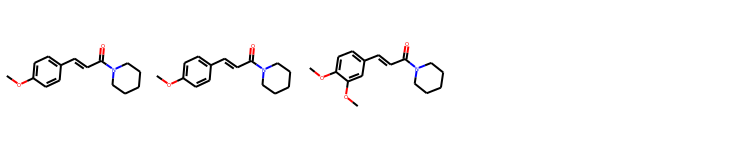

In [287]:
kk = pd.DataFrame({'cl':cls, 'ids':arena.ids})
cl3 = kk[kk.cl == 16]['ids']
smis = smidf[smidf.id.isin(cl3)]['smiles']
paintmols(smis)

In [163]:
for i in range(1):
    # Init time counter
    start = time.time()
        
    # Write df of smiles, id
    smidf.to_csv('smidf.smi', header = False, sep = ' ', index = False)
    
    # Generate fps file
    sp.call(['rdkit2fps', './smidf.smi', '-o', 'smidf.fps'])
    
    ## Load the FPs into an arena
    try:
        arena = chemfp.load_fingerprints('./smidf.fps')
    except IOError as err:
        sys.stderr.write("Cannot open fingerprint file: %s" % (err,))
        raise SystemExit(2)
    
    # Remove files
    sp.call(['rm', './smidf.smi', './smidf.fps'])

    # Generate the similarity table
    similarity_table = search.threshold_tanimoto_search_symmetric(arena, threshold = 0.8)
    
    # Cluster the data
    clus_res = bclus.taylor_butina_cluster(similarity_table)

    # End time count and report
    end = time.time()
    elapsed_time = end - start
    print(time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))
    

00:00:12


smiles  id
0        CC(=CCCC1(C)C2CC3C(C2)C31C)C(=O)O   1
1         COc1ccc(OC)c(CCc2cc(O)cc(O)c2)c1   2
2      Cc1cc(O)c2c(c1)C(=O)c1ccc(O)cc1C2=O   3
3       CC1Cc2cc(O)c(O)cc2C(c2ccc(O)cc2)C1   4
4  CC(C)c1ccc2c(c1)CCC1C(C)(C(=O)O)CCCC21C   5

In [35]:
clr

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 4.78400000e+03, 0.00000000e+00, 3.00000000e+00],
       [3.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       ...,
       [9.56000000e+03, 9.56300000e+03, 9.75124378e-01, 3.26900000e+03],
       [9.56200000e+03, 9.56400000e+03, 9.96666667e-01, 4.56000000e+03],
       [9.55900000e+03, 9.56500000e+03, 1.00000000e+00, 4.78400000e+03]])

In [30]:
kk = corrsmis(smis)[2]
kk

['C=C1CCC=C(C(=O)O)CCC2C1CC2(C)C',
 'COC(=O)C(NC(=O)c1cccc(NC=O)c1)C(=O)O',
 'OC1CNC(c2nc(-c3ccncc3)no2)C1',
 'C=C1CCC(O)C2(C)CC3(O)OC(=O)C(C)=C3CC12',
 'CN1CCN(C2C(CN)OC(CO)C2O)CC1',
 'CC1(C)CCCC2(C)c3cccc(O)c3CCC12',
 'CC1(C)CC23CC(=O)CC2C1CCC3C(=O)O',
 'C=C1CCC2C(C)(C)CCCC2(C)C1CCc1ccoc1',
 'CC(C)C(=O)OCC1CCC[N+]2(C)CCCCC12',
 'CC1CCC2C(C)(CO)C3CC12CCC3(C)O',
 'OCC(O)C(O)c1cc(O)c(O)c(O)c1O',
 'C=C1CCC=C(C(=O)O)CCC2(C)C(C)CCC(=C)CCC12',
 'CN1C(=O)c2ccccc2OC2CN(C3COC3)CC21',
 'Cc1ccc2c(c1)nc1n2C(CNS(C)(=O)=O)COC1',
 'CC(=O)N1CCC(c2nc3cc(F)ccc3[nH]2)C1',
 'C=C1CCC=C(C(=O)O)CCC2C1CC2(C)C',
 'COC1C2=C(COC2=O)C2(C)CCCC(C)(C)C2C1O',
 'NC1(Cc2cc(CN3CCOCC3)on2)COC1',
 'O=C1CC(c2ccccc2)Oc2c1ccc1ccccc21',
 'C=C1C(=O)OC2C3=C(C)C(=O)CC3C(C)CC(O)C12',
 'CC(C)C1NC(=O)c2c1n(C)c1ccccc1c2=O',
 'OC1CNC(c2nc(-c3ccc(F)cc3)no2)C1',
 'COc1c(O)cc2c(c1O)C(=O)OC(C)C2O',
 'Cc1ccc(-c2noc(C3CC(O)CN3C)n2)cc1',
 'CC(=CCCC(C)(O)c1ccc(C)cc1)C(=O)O',
 'COc1ccc(C(=O)NC(CC(C)C)C(=O)O)cc1',
 'COc1c(O)ccc2c(=O)c3ccccc3o

In [80]:
arena = smidf2arena(smidf)

In [19]:
corrsmis(smis)

(4784,
 4784,
 ['C=C1CCC=C(C(=O)O)CCC2C1CC2(C)C',
  'COC(=O)C(NC(=O)c1cccc(NC=O)c1)C(=O)O',
  'OC1CNC(c2nc(-c3ccncc3)no2)C1',
  'C=C1CCC(O)C2(C)CC3(O)OC(=O)C(C)=C3CC12',
  'CN1CCN(C2C(CN)OC(CO)C2O)CC1',
  'CC1(C)CCCC2(C)c3cccc(O)c3CCC12',
  'CC1(C)CC23CC(=O)CC2C1CCC3C(=O)O',
  'C=C1CCC2C(C)(C)CCCC2(C)C1CCc1ccoc1',
  'CC(C)C(=O)OCC1CCC[N+]2(C)CCCCC12',
  'CC1CCC2C(C)(CO)C3CC12CCC3(C)O',
  'OCC(O)C(O)c1cc(O)c(O)c(O)c1O',
  'C=C1CCC=C(C(=O)O)CCC2(C)C(C)CCC(=C)CCC12',
  'CN1C(=O)c2ccccc2OC2CN(C3COC3)CC21',
  'Cc1ccc2c(c1)nc1n2C(CNS(C)(=O)=O)COC1',
  'CC(=O)N1CCC(c2nc3cc(F)ccc3[nH]2)C1',
  'C=C1CCC=C(C(=O)O)CCC2C1CC2(C)C',
  'COC1C2=C(COC2=O)C2(C)CCCC(C)(C)C2C1O',
  'NC1(Cc2cc(CN3CCOCC3)on2)COC1',
  'O=C1CC(c2ccccc2)Oc2c1ccc1ccccc21',
  'C=C1C(=O)OC2C3=C(C)C(=O)CC3C(C)CC(O)C12',
  'CC(C)C1NC(=O)c2c1n(C)c1ccccc1c2=O',
  'OC1CNC(c2nc(-c3ccc(F)cc3)no2)C1',
  'COc1c(O)cc2c(c1O)C(=O)OC(C)C2O',
  'Cc1ccc(-c2noc(C3CC(O)CN3C)n2)cc1',
  'CC(=CCCC(C)(O)c1ccc(C)cc1)C(=O)O',
  'COc1ccc(C(=O)NC(CC(C)C)C

In [341]:
# Generate the similarity table
similarity_table = search.threshold_tanimoto_search_symmetric(arena, threshold = 0.8)

In [342]:
# Cluster the data
clus_res = bclus.taylor_butina_cluster(similarity_table)

In [347]:
type(clus_res.false_singletons)

list

In [31]:
smis

['CC=C(C)C(=O)OC1Cc2c3c(c4oc(CO)cc(=O)c4c2O)C2Cc4cc(O)ccc4CCC(CC(Cc4ccc(N)nc4)C1(C)O3)c1c2ccnc1N',
 'CC(NC(=O)C1CCCC1)c1onc(-c2ccc(F)cc2)c1C(=O)O',
 'CCOC(=O)C1=CC(=CC[n+]2cc[nH]c2[N+]2=CN=C3C(=O)N=C(N)N=C32)c2c(cc3c(c2OC)C2CCCC(C)(O)C2O3)O1',
 'C=CC1(C)CCC=C(C)C1',
 'C=C1CC2C3(C)C(O)CC(=O)C(C)(C)C3C(O)C(OC(C)=O)C2(C)C2C(=O)OC(C)(C(=O)OC)C(=O)C12C',
 'COc1cc(NC(=O)NC2COC3C(Nc4nccc(-c5cccs5)n4)COC23)cc(OC)c1',
 'CC1(C)CCCC2(C)c3cc(O)ccc3CCC12',
 'COCCNC(=O)CC1OC(CNS(=O)(=O)c2ccc(Cl)cc2)C(O)C1O',
 'CC(C)CCCC(C)C1CCC2C3CCC4CC(O)CCC4(C)C3CCC12',
 'CN1C(CCC(=O)NCc2ccco2)CNC(=O)C2C1CCN2Cc1ncc[nH]1',
 'C=C1CCC(O)C2(C)CCC(C(C)C)C(O)C12',
 'CCC1(C=C2OC(=O)C3=C2CCC2C4CCC5(C6=CCC(C)C(O)SSC7C=Cc8c(ccnc8N7)CC4=C5C(=O)O6)C32)CCCC1',
 'CC(C(=O)N1CCCC1)C1CCC2(C)CCC(NC(=O)c3ccc(C#N)cc3)C(C)C2C1O',
 'C=C(C)C1CCC2(C)CCC3(C)C(CCC4C5(C)CCC(OC(=O)C=Cc6ccccc6)C(C)(C)C5CCC43C)C12',
 'CC(O)CCCCCC=CC(=O)CCc1ccc(O)c(OCCc2ccc(O)cc2-c2cc(CO)c3c(c2)=C[CH+]N=3)c1',
 'O=C(O)c1ccccc1Cl',
 'C=C(C)C1CCC2(C(=O)O)CCC3(C)C

In [49]:
kk = pd.DataFrame.from_dict(dict([(sid, smi) for sid, smi in enumerate(smis)]), orient = 'index')

In [57]:
kk['id']=range(len(smis))

In [58]:
kk.head()

0  id
0  CC=C(C)C(=O)OC1Cc2c3c(c4oc(CO)cc(=O)c4c2O)C2Cc...   0
1       CC(NC(=O)C1CCCC1)c1onc(-c2ccc(F)cc2)c1C(=O)O   1
2  CCOC(=O)C1=CC(=CC[n+]2cc[nH]c2[N+]2=CN=C3C(=O)...   2
3                                 C=CC1(C)CCC=C(C)C1   3
4  C=C1CC2C3(C)C(O)CC(=O)C(C)(C)C3C(O)C(OC(C)=O)C...   4

In [67]:
len([smi for smi in smis if [smi != None for smi in smis]])

5000

In [69]:
sum([smi != None for smi in smis])

5000

In [89]:

arena.ids[]

'1979'

In [404]:
smis = smif2smis('../exp2/con50000.csv')
smis = corrsmis(smis)[2]
random.shuffle(smis)
smidf = smis2smidf(smis)
arena = smidf2arena(smidf)
smidf.head()

RDKit ERROR: [12:33:50] SMILES Parse Error: unclosed ring for input: 'CC(C)C1=CC2C(CCC2(C)O)C(C)=C2C3=O'
RDKit ERROR: [12:33:50] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 9 11
RDKit ERROR: 
RDKit ERROR: [12:33:50] SMILES Parse Error: unclosed ring for input: 'C=C(C(=O)O)C(O)C1C(C(C)C)CCC2(C)OO'
RDKit ERROR: [12:33:50] SMILES Parse Error: unclosed ring for input: 'CC1CC(O)C=CC(O)C=CC(=O)N1CCC(O)C2'
RDKit ERROR: [12:33:50] SMILES Parse Error: extra open parentheses for input: 'CC(=CCCC1(C)C2CCC(C2)C1(C)OC(C)=O'
RDKit ERROR: [12:33:51] SMILES Parse Error: unclosed ring for input: 'C=C1C(=O)OC2C1C(O)CC1(C)C(O)CCC1O'
RDKit ERROR: [12:33:51] SMILES Parse Error: unclosed ring for input: 'CC1(C)CCCC2(C)C3CC(=O)CCC3(C)C3CC21'
RDKit ERROR: [12:33:51] SMILES Parse Error: unclosed ring for input: 'CC1(C)CCCC2(C)C3CCC(C)(C)C4CCC12C'
RDKit ERROR: [12:33:51] SMILES Parse Error: extra open parentheses for input: 'CC(=CCCC1(C)C2CCC(C2)C1(C)OC(C)=O'
RDKit ERROR: [12:33:51] SMILES Parse Error: ex

RDKit ERROR: [12:33:51] SMILES Parse Error: unclosed ring for input: 'C=C(C(=O)O)C(O)C1C(C(C)C)CCC2(C)OO'
RDKit ERROR: [12:33:51] SMILES Parse Error: unclosed ring for input: 'C=C(C(=O)O)C(O)C1C(C(C)C)CCC2(C)OO'
RDKit ERROR: [12:33:51] SMILES Parse Error: unclosed ring for input: 'COCc1cn(CC2CC3CN(C)CC2)no1'
RDKit ERROR: [12:33:51] SMILES Parse Error: unclosed ring for input: 'CC1(C)CCCC2(C)C3CC(=O)CCC3(C)C3CC21'
RDKit ERROR: [12:33:51] SMILES Parse Error: unclosed ring for input: 'CC1(C)CCCC2(C)C3CC(=O)CCC3(C)C3CC21'
RDKit ERROR: [12:33:51] SMILES Parse Error: unclosed ring for input: 'C=C1C(=O)OC2C1C(C)(C)C1(O)CC(O)C(O)C1'
RDKit ERROR: [12:33:51] SMILES Parse Error: extra open parentheses for input: 'CC(=CCCC1(C)C2CCC(C2)C1(C)OC(C)=O'
RDKit ERROR: [12:33:51] Explicit valence for atom # 0 Cl, 2, is greater than permitted
RDKit ERROR: [12:33:51] SMILES Parse Error: unclosed ring for input: 'COCc1cn(CC2CC3COC(=O)NC(C)C2)nn1'
RDKit ERROR: [12:33:51] SMILES Parse Error: unclosed ring for 

smiles  id
0     COc1c(O)cc2c(c1O)C(=O)OC(C)C2O  s1
1      CS(=O)(=O)NCC1OCC(NC2CCC2)C1O  s2
2  CCN1CC2(C1)CN(C(C)=O)CC1CC(O)CN12  s3
3      CC(=O)NC1COC(CN2CCC(C)CC2)C1O  s4
4          COc1cc2occc2c2oc(=O)ccc12  s5

In [417]:
clr = clusmidf(smidf)
clr2 = clusmidf(smidf, method = 'cl', th = 0.55)

00:00:06
00:00:12


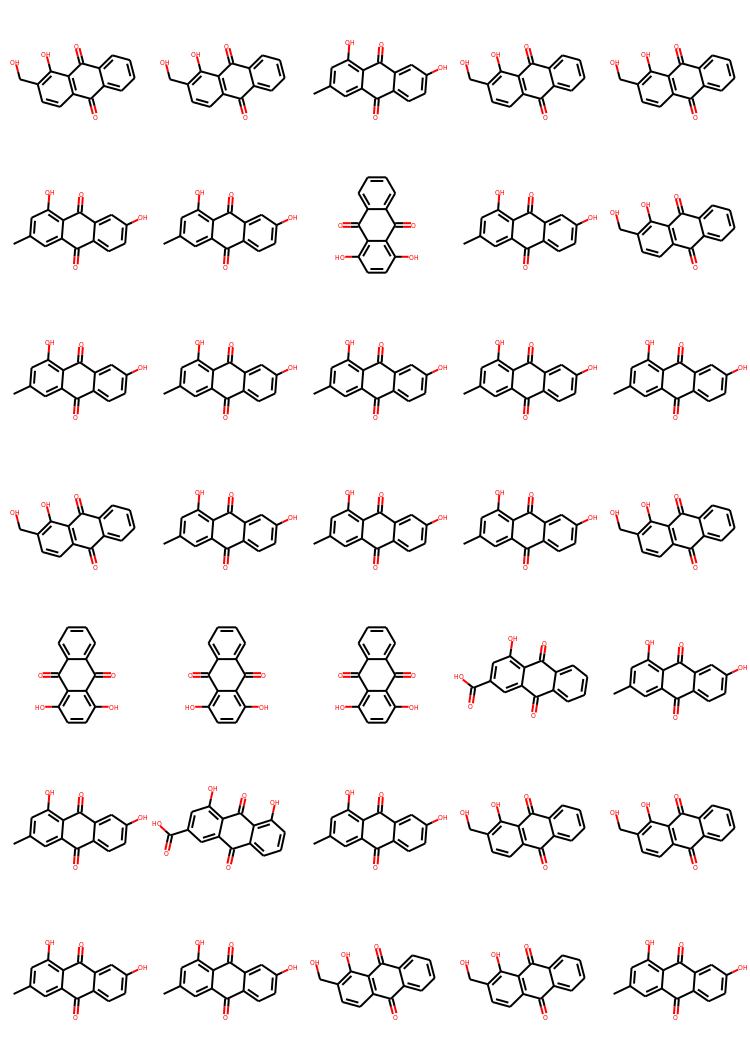

In [423]:
c = clr[20]
ms = []
ms = [Chem.MolFromSmiles(s) for s in smidf[smidf['id'].isin(c)]['smiles']]
Draw.MolsToGridImage(ms,molsPerRow=5,subImgSize=(150,150))

In [252]:
def paintmols(smis, molsPerRow = 5, subImgSize=(150,150)):
    ms = [Chem.MolFromSmiles(s) for s in smis]
    return Draw.MolsToGridImage(ms,molsPerRow=molsPerRow,subImgSize=subImgSize)

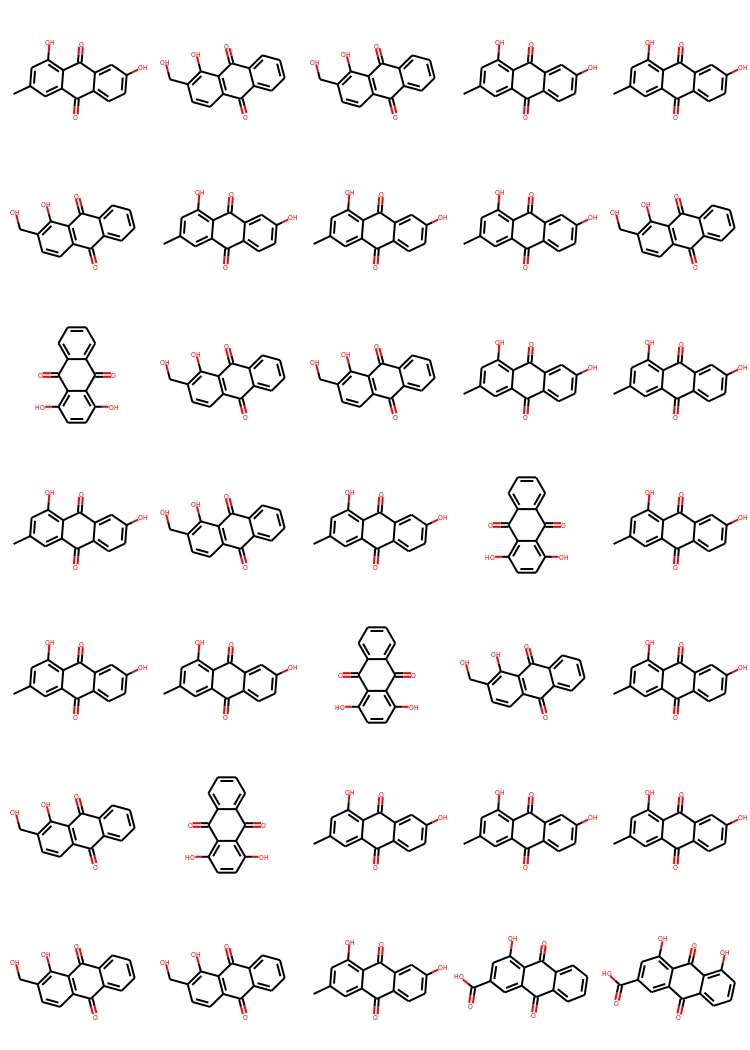

In [253]:
smis = smidf[smidf['id'].isin(c)]['smiles']
paintmols(smis)

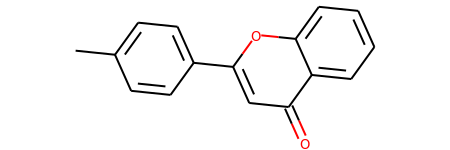

In [168]:
mc = Chem.MolFromSmiles('Cc1ccc(-c2cc(=O)c3ccccc3o2)cc1')
mc

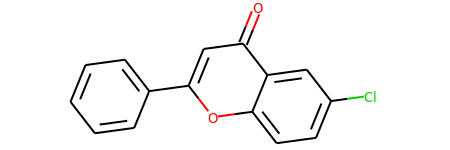

In [172]:
m01 = Chem.MolFromSmiles('O=c1cc(-c2ccccc2)oc2ccc(Cl)cc12')
m01

In [425]:
len(clr)

602

In [53]:
len(shit)

130

In [54]:
clus_res = []

In [55]:
cl = [1,2,5]

In [56]:
clus_res.append(cl)

In [57]:
clus_res

[[1, 2, 5]]

In [58]:
cl = [3,4,1]

In [59]:
clus_res.append(cl)

In [60]:
clus_res

[[1, 2, 5], [3, 4, 1]]

In [62]:
len(clus_res)

2

In [101]:
['s' + str(x) for x in range(1, len(smis)+1)]

['s1',
 's2',
 's3',
 's4',
 's5',
 's6',
 's7',
 's8',
 's9',
 's10',
 's11',
 's12',
 's13',
 's14',
 's15',
 's16',
 's17',
 's18',
 's19',
 's20',
 's21',
 's22',
 's23',
 's24',
 's25',
 's26',
 's27',
 's28',
 's29',
 's30',
 's31',
 's32',
 's33',
 's34',
 's35',
 's36',
 's37',
 's38',
 's39',
 's40',
 's41',
 's42',
 's43',
 's44',
 's45',
 's46',
 's47',
 's48',
 's49',
 's50',
 's51',
 's52',
 's53',
 's54',
 's55',
 's56',
 's57',
 's58',
 's59',
 's60',
 's61',
 's62',
 's63',
 's64',
 's65',
 's66',
 's67',
 's68',
 's69',
 's70',
 's71',
 's72',
 's73',
 's74',
 's75',
 's76',
 's77',
 's78',
 's79',
 's80',
 's81',
 's82',
 's83',
 's84',
 's85',
 's86',
 's87',
 's88',
 's89',
 's90',
 's91',
 's92',
 's93',
 's94',
 's95',
 's96',
 's97',
 's98',
 's99',
 's100',
 's101',
 's102',
 's103',
 's104',
 's105',
 's106',
 's107',
 's108',
 's109',
 's110',
 's111',
 's112',
 's113',
 's114',
 's115',
 's116',
 's117',
 's118',
 's119',
 's120',
 's121',
 's122',
 's123',
 